In [1]:
import matplotlib.pyplot as plt ### plotting things
from matplotlib import rc
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

### This is the data analysed to take advantage of the Wadsworth corrections

#### Method
1. Find the grating offset using the diffration angles recorded (keeping correct signs) and Equation 12
1. Find the correct theta positive and negative values as layed out in Equations 2 and 3
1. Calculate $\frac{2\lambda}{nd}$ using equation 7$\frac{2\lambda}{nd}$
1. Calculate the ratio of the Rydbergs from the ratio of the wavelengths for each emission line (the $\frac{2}{nd}$ should cancel)


In [2]:
data = pd.read_csv("sem2_project_data.csv")

# Using the notation Prof. Wadsworth used in his notes
# This is correcting for the "centre point" recorded
data["AlphaPos"] = (data["angleL"] + data["arcminL"]/60) + (360-(data["centre"] + data["arcminC"]/60))
data["AlphaNeg"] = -1*((data["centre"] + data["arcminC"]/60) - (data["angleR"] + data["arcminR"]/60))



In [3]:
rad = 2*np.pi / 360

# function that returns the grating offset Beta in degrees
def beta(alphaNeg, alphaPos):
    return (np.sin(alphaPos * rad) + np.sin(alphaNeg * rad))/(2 - np.cos(alphaNeg * rad) - np.cos(alphaPos * rad))

# creating a column to store Beta Values using equation 12
data["Beta"] = beta(data["AlphaNeg"], data["AlphaPos"]) * rad**-1

In [4]:
# using equations 2 and 3 to get Theta values
data["ThetaNeg"] = data["AlphaNeg"] - data["Beta"]
data["ThetaPos"] = data["AlphaPos"] - data["Beta"]


In [5]:
data

,Run,nf,angleL,arcminL,angleR,arcminR,centre,arcminC,AlphaPos,AlphaNeg,Beta,ThetaNeg,ThetaPos
0,H_B,5.0,14.0,22.0,344.5,2.0,359.0,28.0,14.900000,-14.933333,-4.779108e-01,-14.455423,15.377911
1,H_B,5.0,14.0,24.0,344.5,1.0,359.0,28.0,14.933333,-14.950000,-2.381335e-01,-14.711867,15.171467
2,H_B,5.0,14.0,22.0,344.5,3.0,359.0,28.0,14.900000,-14.916667,-2.392306e-01,-14.677436,15.139231
3,H_B,5.0,14.0,24.0,344.5,2.0,359.0,28.0,14.933333,-14.933333,1.130071e-12,-14.933333,14.933333
4,H_B,5.0,14.0,24.0,344.5,2.0,359.0,28.0,14.933333,-14.933333,1.130071e-12,-14.933333,14.933333
5,H_G,4.0,16.0,14.0,342.5,14.0,359.0,28.0,16.766667,-16.733333,3.761494e-01,-17.109483,16.390517
6,H_G,4.0,16.0,15.0,342.5,15.0,359.0,28.0,16.783333,-16.716667,7.522966e-01,-17.468963,16.031037
7,H_G,4.0,16.0,14.0,342.5,15.0,359.0,28.0,16.766667,-16.716667,5.648060e-01,-17.281473,16.201861
8,H_G,4.0,16.0,15.0,342.5,15.0,359.0,28.0,16.783333,-16.716667,7.522966e-01,-17.468963,16.031037
9,H_G,4.0,16.0,14.0,342.5,16.0,359.0,28.0,16.766667,-16.700000,7.538512e-01,-17.453851,16.012815


In [6]:
# using equation 7 
data["2lambda/nd"] = np.sin(data["ThetaPos"] * rad) - np.sin(data["ThetaNeg"] * rad)

# estimate of wavelength [d VALUE INCORRECT]
data["Wavelength"] = data["2lambda/nd"] * (1.68465e-6/2) * 1.00029e9

In [7]:
data

,Run,nf,angleL,arcminL,angleR,arcminR,centre,arcminC,AlphaPos,AlphaNeg,Beta,ThetaNeg,ThetaPos,2lambda/nd,Wavelength
0,H_B,5.0,14.0,22.0,344.5,2.0,359.0,28.0,14.900000,-14.933333,-4.779108e-01,-14.455423,15.377911,0.514811,433.764013
1,H_B,5.0,14.0,24.0,344.5,1.0,359.0,28.0,14.933333,-14.950000,-2.381335e-01,-14.711867,15.171467,0.515667,434.485035
2,H_B,5.0,14.0,22.0,344.5,3.0,359.0,28.0,14.900000,-14.916667,-2.392306e-01,-14.677436,15.139231,0.514543,433.537709
3,H_B,5.0,14.0,24.0,344.5,2.0,359.0,28.0,14.933333,-14.933333,1.130071e-12,-14.933333,14.933333,0.515390,434.251718
4,H_B,5.0,14.0,24.0,344.5,2.0,359.0,28.0,14.933333,-14.933333,1.130071e-12,-14.933333,14.933333,0.515390,434.251718
5,H_G,4.0,16.0,14.0,342.5,14.0,359.0,28.0,16.766667,-16.733333,3.761494e-01,-17.109483,16.390517,0.576381,485.641082
6,H_G,4.0,16.0,15.0,342.5,15.0,359.0,28.0,16.783333,-16.716667,7.522966e-01,-17.468963,16.031037,0.576347,485.612406
7,H_G,4.0,16.0,14.0,342.5,15.0,359.0,28.0,16.766667,-16.716667,5.648060e-01,-17.281473,16.201861,0.576088,485.394398
8,H_G,4.0,16.0,15.0,342.5,15.0,359.0,28.0,16.783333,-16.716667,7.522966e-01,-17.468963,16.031037,0.576347,485.612406
9,H_G,4.0,16.0,14.0,342.5,16.0,359.0,28.0,16.766667,-16.700000,7.538512e-01,-17.453851,16.012815,0.575790,485.142868


In [8]:
# splits the dataframe into two smaller sets for ease of use
Hydrogen = data.iloc[[0,1,2,3,5,6,7,8,10,11,12,13],:] 
Deuterium = data[15:27]

In [9]:
Hydrogen

,Run,nf,angleL,arcminL,angleR,arcminR,centre,arcminC,AlphaPos,AlphaNeg,Beta,ThetaNeg,ThetaPos,2lambda/nd,Wavelength
0,H_B,5.0,14.0,22.0,344.5,2.0,359.0,28.0,14.900000,-14.933333,-4.779108e-01,-14.455423,15.377911,0.514811,433.764013
1,H_B,5.0,14.0,24.0,344.5,1.0,359.0,28.0,14.933333,-14.950000,-2.381335e-01,-14.711867,15.171467,0.515667,434.485035
2,H_B,5.0,14.0,22.0,344.5,3.0,359.0,28.0,14.900000,-14.916667,-2.392306e-01,-14.677436,15.139231,0.514543,433.537709
3,H_B,5.0,14.0,24.0,344.5,2.0,359.0,28.0,14.933333,-14.933333,1.130071e-12,-14.933333,14.933333,0.515390,434.251718
5,H_G,4.0,16.0,14.0,342.5,14.0,359.0,28.0,16.766667,-16.733333,3.761494e-01,-17.109483,16.390517,0.576381,485.641082
6,H_G,4.0,16.0,15.0,342.5,15.0,359.0,28.0,16.783333,-16.716667,7.522966e-01,-17.468963,16.031037,0.576347,485.612406
7,H_G,4.0,16.0,14.0,342.5,15.0,359.0,28.0,16.766667,-16.716667,5.648060e-01,-17.281473,16.201861,0.576088,485.394398
8,H_G,4.0,16.0,15.0,342.5,15.0,359.0,28.0,16.783333,-16.716667,7.522966e-01,-17.468963,16.031037,0.576347,485.612406
10,H_R,3.0,22.0,24.0,336.5,4.0,359.0,28.0,22.933333,-22.900000,1.944966e-01,-23.094497,22.738837,0.778780,656.176133
11,H_R,3.0,22.0,24.0,336.5,2.0,359.0,28.0,22.933333,-22.933333,4.426316e-13,-22.933333,22.933333,0.779320,656.630764


gradient: 1.0031696492577278 +/- 0.0009554790589967176
intercept: -1.4394016689573346 +/- 0.5098019337362966


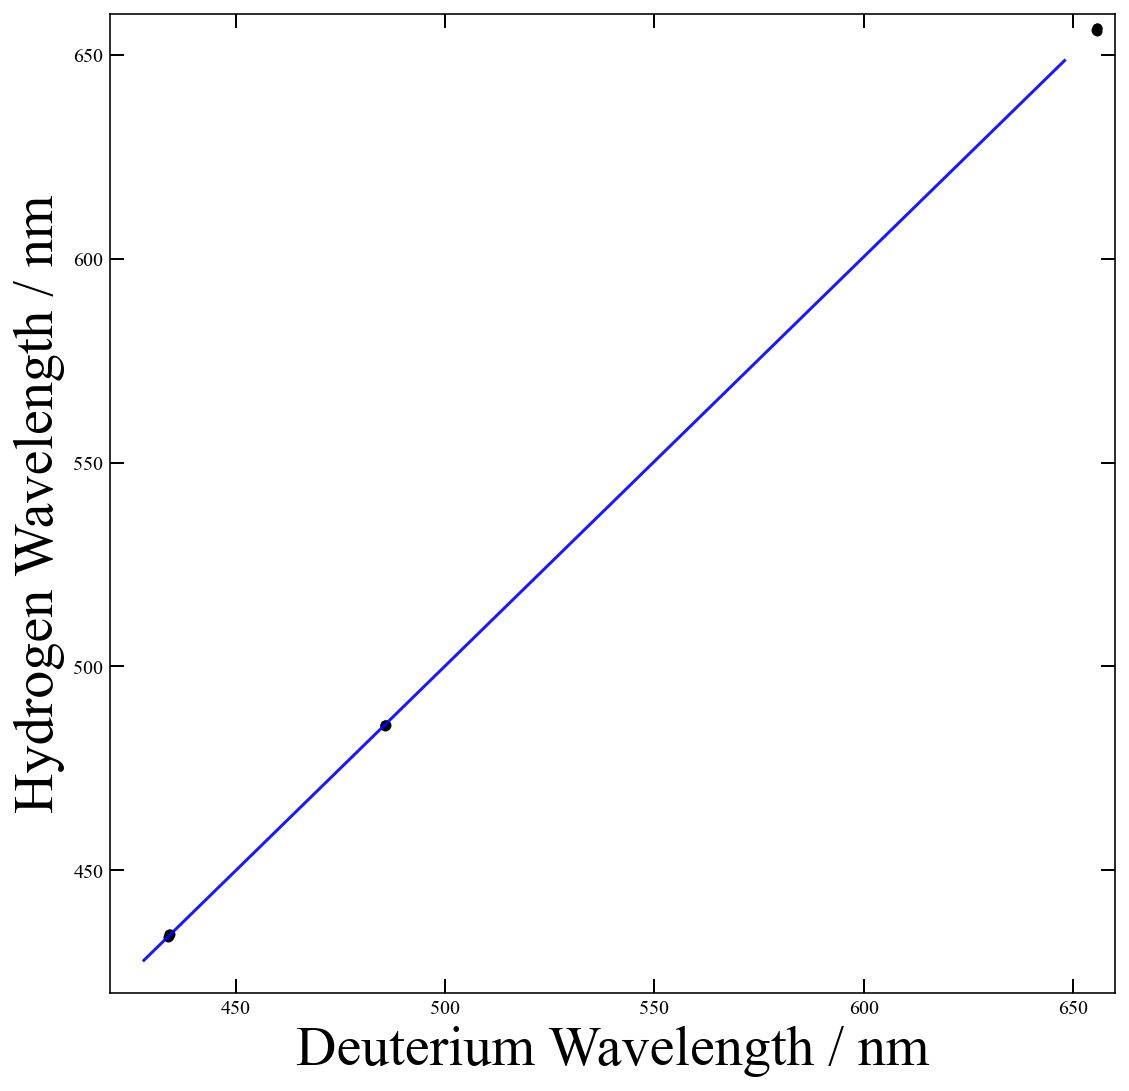

In [10]:
Hydrogen = data.iloc[[0,1,2,3,5,6,7,8,10,11,12,13],:] 
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)

x = Deuterium["2lambda/nd"] * (1.68465e-6/2) * 1.00029e9
y = Hydrogen["2lambda/nd"] * (1.68465e-6/2) * 1.00029e9

plt.plot(x, y, 'k.', ms = 8)

p, V = np.polyfit(x, y, 1, cov=True)
x_data = np.linspace(428, 648)
y_data = p[0] * x_data + p[1]
plt.plot(x_data ,y_data ,'b-', alpha=0.9)

plt.xlim(420, 660)
plt.ylim(420, 660)

plt.rc('font', size=26)
plt.xlabel('Deuterium Wavelength / nm', fontsize=28)
plt.ylabel('Hydrogen Wavelength / nm', fontsize=28)
ax.tick_params(length=7, width =1, direction='in', bottom=True, top=True, right=True, left=True)


print("gradient: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

In [11]:
def nfunction (ni, nf):
    return (1/nf**2)-(1/ni**2)

In [21]:

Deuterium["2lambda/nd"][8:12]

23    0.777971
24    0.778244
25    0.778233
26    0.778233
Name: 2lambda/nd, dtype: float64

In [13]:
Hydrogen = data[:15]

In [14]:
# Ratio of Rydbergs RED
HydrogenMean = np.mean(Hydrogen["2lambda/nd"][10:15])
DeuteriumMean = np.mean(Deuterium["2lambda/nd"][8:12])
RedRatio = HydrogenMean/DeuteriumMean

RedWaveH = HydrogenMean * (1.68465e-6/2) * 1.00029e9

RedWaveD = DeuteriumMean * (1.68465e-6/2) * 1.00029e9

In [15]:
# Ratio of Rydbergs BLUE
HydrogenMean = np.mean(Hydrogen["2lambda/nd"][:5])
DeuteriumMean = np.mean(Deuterium["2lambda/nd"][:4])
BlueRatio = HydrogenMean/DeuteriumMean

BlueWaveH = HydrogenMean * (1.68465e-6/2) * 1.00029e9

BlueWaveD = DeuteriumMean * (1.68465e-6/2) * 1.00029e9

In [16]:
# Ratio of Rydbergs GREEN
HydrogenMean = np.mean(Hydrogen["2lambda/nd"][5:10])
DeuteriumMean = np.mean(Deuterium["2lambda/nd"][4:8])
GreenRatio = HydrogenMean/DeuteriumMean

GreenWaveH = HydrogenMean * (1.68465e-6/2) * 1.00029e9

GreenWaveD = DeuteriumMean * (1.68465e-6/2) * 1.00029e9

In [17]:
# Not sure if we should do a mean or not, will leave it up to yall to decide how you report the final value
MeanRatio = (RedRatio + BlueRatio + GreenRatio) / 3

In [18]:
print("Rydberg Ratios \nBlue: {} \nGreen: {} \nRed: {} \n\nMean {}".format(BlueRatio, GreenRatio, RedRatio, MeanRatio))

Rydberg Ratios 
Blue: 1.0002974480833529 
Green: 0.9996434762252335 
Red: 1.0009898458532176 

Mean 1.0003102567206013


In [25]:
np.sqrt(((BlueRatio-MeanRatio)**2+(GreenRatio-MeanRatio)**2+(RedRatio-MeanRatio)**2)/(3*(3-1)))

0.0003887161945346979

In [19]:
print("Hydrogen Wavelengths / nm (approx) \nBlue: {} \nGreen: {} \nRed: {}\n".format(BlueWaveH, GreenWaveH, RedWaveH))

print("Deuterium Wavelengths / nm (approx) \nBlue: {} \nGreen: {} \nRed: {}\n".format(BlueWaveD, GreenWaveD, RedWaveD))


Hydrogen Wavelengths / nm (approx) 
Blue: 434.0580386940135 
Green: 485.48063229836504 
Red: 656.3114118468657

Deuterium Standard Deviation / nm (approx) 
Blue: 94.97228332878109 
Green: 94.9998252909464 
Red: 94.97228332878109

Deuterium Wavelengths / nm (approx) 
Blue: 433.9289673543626 
Green: 485.6537794170324 
Red: 655.6624071320555

Deuterium Standard Deviation/ nm (approx) 
Blue: 94.69098709842967 
Green: 94.71844748468821 
Red: 94.69098709842967



gradient: 10.980486168608623 +/- 0.04392213308401604
intercept: -0.000830019049594362 +/- 0.007960550825418989
gradient: 10.963379268265383 +/- 0.017815255105238913
intercept: 0.002714996439639638 +/- 0.003228878785594996


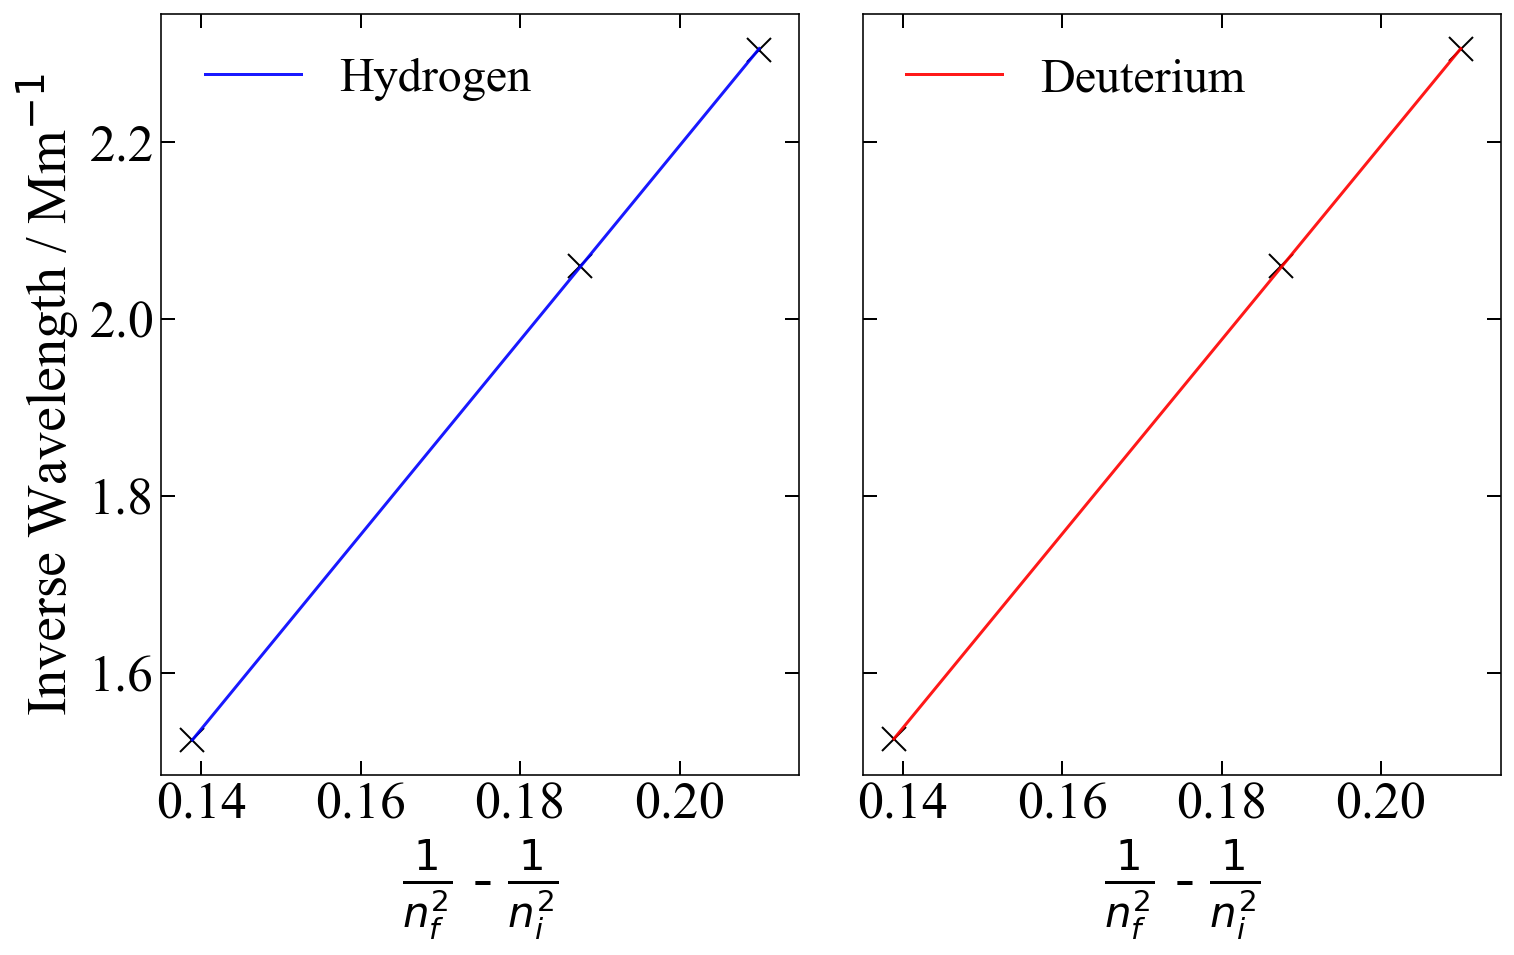

In [20]:

fig = plt.figure(figsize=(12,7))
gs = fig.add_gridspec(1, 2, hspace=0.1, wspace=0.1)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
plt.rc('font', size=26)
y1 = [1e-6/((1e-9)*BlueWaveH), 1e-6/((1e-9)*GreenWaveH), 1e-6/((1e-9)*RedWaveH)]
y2 = [1e-6/((1e-9)*BlueWaveD), 1e-6/((1e-9)*GreenWaveD), 1e-6/((1e-9)*RedWaveD)]
x = [nfunction(5,2),nfunction(4,2),nfunction(3,2)]

ax1.plot(x, y1, 'kx', ms = 12)
ax2.plot(x, y2, 'kx', ms = 12)

p, V = np.polyfit(x, y1, 1, cov=True)
x_data = np.linspace(nfunction(3,2),nfunction(5,2))
y_data = p[0] * x_data + p[1]
ax1.plot(x_data ,y_data ,'b-', alpha=0.9, label="Hydrogen")


print("gradient: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

p, V = np.polyfit(x, y2, 1, cov=True)
x_data = np.linspace(nfunction(3,2),nfunction(5,2))
y_data = p[0] * x_data + p[1]
ax2.plot(x_data ,y_data ,'r-', alpha=0.9,label="Deuterium")


print("gradient: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("intercept: {} +/- {}".format(p[1], np.sqrt(V[1][1])))



ax1.set_ylabel('Inverse Wavelength / Mm$^{-1}$', fontsize=28)
ax1.set_xlabel(r"$\frac{1}{n_{f}^2}$ - $\frac{1}{n_{i}^2}$", fontsize=30)
ax2.set_xlabel(r"$\frac{1}{n_{f}^2}$ - $\frac{1}{n_{i}^2}$", fontsize=30)
ax1.tick_params(length=7, width =1, direction='in', bottom=True, top=True, right=True, left=True)
ax2.tick_params(length=7, width =1, direction='in', bottom=True, top=True, right=True, left=True)

ax1.set_xlim(0.135,0.215)
ax2.set_xlim(0.135,0.215)
ax1.legend(loc='upper left', fontsize=24, framealpha=0)
ax2.legend(loc='upper left', fontsize=24,framealpha=0)

14&24&344.5&3&
14&26&344.5&5&
14&26&344.5&6&
14&27&344.5&5&
16&16&342.5&16&
16&16&342.5&15&
16&15&342.5&15&
16&15&342.5&15&
22&23&336.5&6&
22&23&336.5&5&
22&24&336.5&6&
22&24&336.5&6&

16 & 14&342.5&14&16.767&-16.733\\
16 & 15&342.5&15&16.783&-16.717\\
16 & 14&342.5&15&16.767&-16.717\\
16 & 15&342.5&15&16.783&-16.717\\
16 & 14&342.5&16&16.767&-16.700\\
22 & 24&336.5&4&22.933&-22.900\\
22 & 24&336.5&2&22.933&-22.933\\
22 & 24&336.5&5&22.933&-22.883\\
22 & 25&336.5&3&22.950&-22.917\\
22 & 24&336.5&4&22.933&-22.900\\